0.7535150785720678


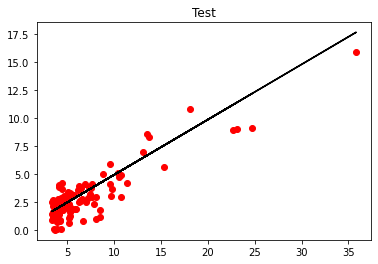

In [372]:
## Módulo 2 Machine Learning
## Linear Regression con frameworks
## Eduardo Rodríguez Gil
## A01274913

# Importamos las librerias que vamos a utilizar.
import pandas as pd # La libreria de pandas la utilizamos para leer el archivo csv del dataframe.
import matplotlib.pyplot as plt # La libreria de matplotlib la utilizamos para poder mostrar nuestra gráfica.
import numpy as np # La libreria de numpy la utilizamos para nuestros array.
from sklearn.linear_model import LinearRegression #La libreria de sklearn.linear_model la utilizamos para hacer nuestra Linear Regression.
from sklearn.model_selection import train_test_split, learning_curve # La libreria de sklearn.model_selection la utilizamos para hacer el train y el test.

df = pd.read_csv('vgsales.csv') # Mandamos a llamar nuestro archivo csv del dataframe.

x = df[['Global_Sales', 'NA_Sales']] # Definimos nuestras variables
x.columns = ['Global_Sales', 'NA_Sales'] # Utilizamos el columns para mostrar solo las columnas que definimos

X = np.array(x['Global_Sales']).reshape(-1, 1) # Definimos nuestra variable X en un array
Y = np.array(x['NA_Sales']).reshape(-1, 1) # Definimos nuestra variable Y en un array

train_ratio = 0.55 # Datos para entrenamiento
validation_ratio = 0.25 # Datos para validacion
test_ratio = 0.20 # Datos de prueba

# Ahora los datos de entrenamiento son 75%
# the _junk suffix means that we drop that variable completely
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1.20 - train_ratio)

# Los datos de prueba son de 10%
# Los datos de validación son de 15%
x_val, X_test, y_val, Y_test = train_test_split(X_test, Y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

# Utilizamos sklearn.linear_model para realizar la Linear Regression
linear_reg = LinearRegression()

# Dividimos los datos en datos en train y test y imprimimos nuestro score
linear_reg.fit(X_train, Y_train)
print(linear_reg.score(X_test, Y_test))

# Utilizamos predict para X_test y luego imprimimos nuestras predicciones
Y_predict = linear_reg.predict(X_test)
# Imprimimos predict


X_predict = linear_reg.predict(X_train)


# Graficamos la Linear Regression Test
plt.scatter(X_test, Y_test, color = 'r')
plt.plot(X_test, Y_predict, color = 'k')
plt.title('Test')
plt.show() # Mostramos la gráfica

0.8854705469938543


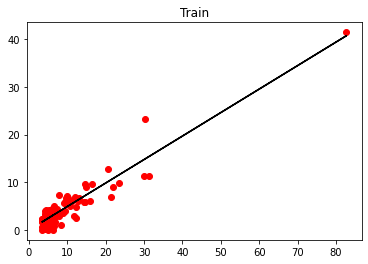

In [373]:
# Graficamos la Linear Regression Train
print(linear_reg.score(X_train, Y_train))

X_predict = linear_reg.predict(X_train)
 
plt.scatter(X_train, Y_train, color = 'r')
plt.plot(X_train, X_predict, color = 'k')
plt.title('Train')
plt.show() # Mostramos la gráfica

0.8046238092966089


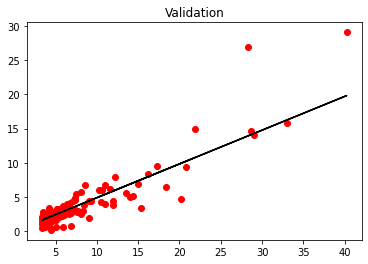

In [374]:
# Graficamos la Linear Regression Test
print(linear_reg.score(x_val, y_val))

X_predict = linear_reg.predict(x_val)
 
plt.scatter(x_val, y_val, color = 'r')
plt.plot(x_val, X_predict, color = 'k')
plt.title('Validation')
plt.show() # Mostramos la gráfica

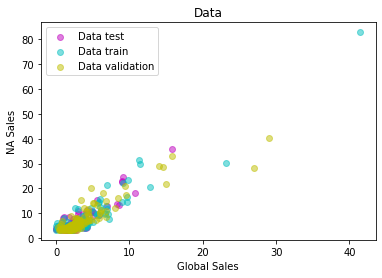

In [376]:
# Graficamos los datos de test, train y validation
plt.scatter(Y_test, X_test, label = "Data test", color = 'm', alpha = 0.5)
plt.scatter(Y_train, X_train, label = "Data train", color = 'c', alpha = 0.5)
plt.scatter(y_val, x_val, label = "Data validation", color ='y', alpha = 0.5)
plt.title("Data")
plt.xlabel("Global Sales")
plt.ylabel("NA Sales")
plt.legend()
plt.show()

In [377]:
# Hyperparameter Optimization

from sklearn.svm import SVC

# Posibles hyperparametros
C_values = [0.01, 0.03, 0.1, 0.3, 1, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 1, 3, 10, 30, 100]

# Accuracy dada para nuestro modelo
best_score = 0
best_params = {'C': None, 'gamma': None}

# Proceso de Hyperparameter optimization
for C in C_values:
  # Entrenamos el modelo para cada valor del hyperparametro
  for gamma in gamma_values:
    svc = SVC(C=C, gamma=gamma)
    linear_reg.fit(X, Y)
    score_train = linear_reg.score(X_train, Y_train)
    score_test = linear_reg.score(X_test, Y_test)

    # Mostramos el score del modelo de train y test
    if score_train > best_score:
      best_score1 = score_train

    if score_test > best_score:
      best_score2 = score_test

print('Train =', best_score1)
print('Test =', best_score2)

Train = 0.8833930573827804
Test = 0.7523030450405994
